In [39]:
from qutip import *
import numpy as np
import importlib
import functions_fbq
import figurestyle
from functions_fbq import *
from figurestyle import *
importlib.reload(functions_fbq)
importlib.reload(figurestyle)
import matplotlib.pyplot as plt
from tqdm import tqdm
from mpl_toolkits import mplot3d
from scipy.interpolate import interp1d

elemento de matriz vs. r
derivada de f_01 vs. r
frecuencia vs. r

* Hacerlo para el hamiltoniano de Zazunov así como para el de una juntura Josephson.
* Luego debo estudiar más el blochnium y encontrar los parámetros óptimos con el que se maximiza la coherencia.
* Posteriormente puedo estudiar la forma de realizar operaciones con el blochnium que maximice el ratio: tiempo de coherencia / tiempo de manipulación.


In [40]:
# Simulation parameters
N = 100
eigvals = 6
# System parameters
Ec = 40e9
El = 0.05e9
EDelta = 20e9

In [19]:
r_list = np.linspace(0.05, 1, 100)
eigvals_list_phi_0 = np.zeros((len(r_list), eigvals))
eigvals_list_phi_pi = np.zeros((len(r_list), eigvals))
phi_matrix_elements_list = np.zeros((2,len(r_list))) # 0: phi_ext = 0, 1: phi_ext = pi
n_matrix_elements_list = np.zeros((2,len(r_list))) # 0: phi_ext = 0, 1: phi_ext = pi

for i,r in enumerate(tqdm(r_list)):
    phi_ext = 0
    eigvals_list_phi_0[i,:], _, matrix_op_sqr_list = eigensystem_and_matrix_elements_sqr_fbq(Ec,El,EDelta,phi_ext,r, N = 100, eigvals = eigvals)
    phi_matrix_elements_list[0,i] = np.abs(matrix_op_sqr_list[0])**2
    n_matrix_elements_list[0,i] = np.abs(matrix_op_sqr_list[1])**2

    phi_ext = np.pi
    eigvals_list_phi_pi[i,:], _, matrix_op_sqr_list = eigensystem_and_matrix_elements_sqr_fbq(Ec,El,EDelta,phi_ext,r, N = 100, eigvals = eigvals)
    phi_matrix_elements_list[1,i] = np.abs(matrix_op_sqr_list[0])**2
    n_matrix_elements_list[1,i] = np.abs(matrix_op_sqr_list[1])**2

100%|██████████| 100/100 [00:40<00:00,  2.49it/s]


In [20]:
phi_list = np.linspace(0, 2*np.pi, 100)
eigvals_list_r_10 = np.zeros((len(phi_list), eigvals))
eigvals_list_r_05 = np.zeros((len(phi_list), eigvals))
eigvals_list_r_005 = np.zeros((len(phi_list), eigvals))
phi_matrix_elements_vs_phi_list = np.zeros((3,len(phi_list))) # 0: r = 0.9, 1: r = 0.5, 2: r = 0.05
n_matrix_elements_vs_phi_list = np.zeros((3,len(phi_list))) # 0: r = 0.9, 1: r = 0.5, 2: r = 0.05

for i,phi_ext in enumerate(tqdm(phi_list)):
    r = 0.9
    eigvals_list_r_10[i,:], _, matrix_op_sqr_list = eigensystem_and_matrix_elements_sqr_fbq(Ec,El,EDelta,phi_ext,r, N = 100, eigvals = eigvals)
    phi_matrix_elements_vs_phi_list[0,i] = np.abs(matrix_op_sqr_list[0])**2
    n_matrix_elements_vs_phi_list[0,i] = np.abs(matrix_op_sqr_list[1])**2

    r = 0.5
    eigvals_list_r_05[i,:], _, matrix_op_sqr_list = eigensystem_and_matrix_elements_sqr_fbq(Ec,El,EDelta,phi_ext,r, N = 100, eigvals = eigvals)
    phi_matrix_elements_vs_phi_list[1,i] = np.abs(matrix_op_sqr_list[0])**2
    n_matrix_elements_vs_phi_list[1,i] = np.abs(matrix_op_sqr_list[1])**2

    r = 0.05
    eigvals_list_r_005[i,:], _, matrix_op_sqr_list = eigensystem_and_matrix_elements_sqr_fbq(Ec,El,EDelta,phi_ext,r, N = 100, eigvals = eigvals)
    phi_matrix_elements_vs_phi_list[2,i] = np.abs(matrix_op_sqr_list[0])**2
    n_matrix_elements_vs_phi_list[2,i] = np.abs(matrix_op_sqr_list[1])**2

100%|██████████| 100/100 [00:51<00:00,  1.94it/s]


In [21]:
figure_features()
fig, axs = plt.subplots(4, 2, figsize=(12, 10), sharex = True, sharey = False)

plt.suptitle(r'$E_{C} = %.2f $ GHz $\quad E_{L} = %.3f$ GHz $\quad \Delta = %.0f$ GHz' %(Ec*1e-9, El*1e-9, EDelta*1e-9))
axs[0,0].plot(r_list, eigvals_list_phi_0[:,:]*1e-9)
axs[0,0].set_ylabel(r'Eigennergies (GHz)')
axs[0,0].set_title(r'$\phi_{ext} = 0$')

axs[1,0].plot(r_list, (eigvals_list_phi_0[:,1]-eigvals_list_phi_0[:,0])*1e-9)
axs[1,0].set_ylabel(r'$f_{01}$ (GHz)')

axs[2,0].plot(r_list, phi_matrix_elements_list[0,:])
axs[3,0].plot(r_list, n_matrix_elements_list[0,:])
axs[2,0].set_ylabel(r'$|\langle 1 | \hat{\phi} | 0 \rangle|^2$')
axs[3,0].set_ylabel(r'$|\langle 1 | \hat{n} | 0 \rangle|^2$')

axs[0,1].plot(r_list, eigvals_list_phi_pi[:,:]*1e-9)
axs[0,1].set_title(r'$\phi_{ext} = \pi$')

axs[1,1].plot(r_list, (eigvals_list_phi_pi[:,1]-eigvals_list_phi_pi[:,0])*1e-9)

axs[2,1].plot(r_list, phi_matrix_elements_list[1,:], label = r'$|\langle \phi | \hat{\phi} \rangle|^2$')
axs[3,1].plot(r_list, n_matrix_elements_list[1,:], label = r'$|\langle \phi | \hat{n} \rangle|^2$')

axs[3,0].set_xlabel(r'$r$')
axs[3,1].set_xlabel(r'$r$')

axs[2,0].set_yscale('log')
axs[2,0].set_xscale('log')
axs[2,1].set_yscale('log')
axs[2,1].set_xscale('log')

fig.savefig('r_sweep_Ec%.2f_El%.3f_EDelta%.0f.pdf' %(Ec*1e-9, El*1e-9, EDelta*1e-9), bbox_inches='tight')
plt.tight_layout()
# plt.show()

In [ ]:
figure_features()
fig, axs = plt.subplots(4, 3, figsize=(18, 10), sharex = True, sharey = False)

plt.suptitle(r'$E_{C} = %.2f $ GHz $\quad E_{L} = %.3f$ GHz $\quad \Delta = %.0f$ GHz' %(Ec*1e-9, El*1e-9, EDelta*1e-9))
axs[0,0].plot(phi_list/2/np.pi, eigvals_list_r_10[:,:]*1e-9)
axs[0,0].set_ylabel(r'Eigennergies (GHz)')
axs[0,0].set_title(r'$r = 0.9$')

axs[1,0].plot(phi_list/2/np.pi, (eigvals_list_r_10[:,1]-eigvals_list_r_10[:,0])*1e-9)
axs[1,0].set_ylabel(r'$f_{01}$ (GHz)')

axs[2,0].plot(phi_list/2/np.pi, phi_matrix_elements_vs_phi_list[0,:])
axs[3,0].plot(phi_list/2/np.pi, n_matrix_elements_vs_phi_list[0,:])
axs[2,0].set_ylabel(r'$|\langle 1 | \hat{\phi} | 0 \rangle|^2$')
axs[3,0].set_ylabel(r'$|\langle 1 | \hat{n} | 0 \rangle|^2$')

axs[0,1].plot(phi_list/2/np.pi, eigvals_list_r_05[:,:]*1e-9)
axs[0,1].set_title(r'$r = 0.5$')

axs[1,1].plot(phi_list/2/np.pi, (eigvals_list_r_05[:,1]-eigvals_list_r_05[:,0])*1e-9)

axs[2,1].plot(phi_list/2/np.pi, phi_matrix_elements_vs_phi_list[1,:], label = r'$|\langle \phi | \hat{\phi} \rangle|^2$')
axs[3,1].plot(phi_list/2/np.pi, n_matrix_elements_vs_phi_list[1,:], label = r'$|\langle \phi | \hat{n} \rangle|^2$')

axs[0,2].plot(phi_list/2/np.pi, eigvals_list_r_005[:,:]*1e-9)
axs[0,2].set_title(r'$r = 0.05$')

axs[1,2].plot(phi_list/2/np.pi, (eigvals_list_r_005[:,1]-eigvals_list_r_005[:,0])*1e-9)

axs[2,2].plot(phi_list/2/np.pi, phi_matrix_elements_vs_phi_list[2,:], label = r'$|\langle \phi | \hat{\phi} \rangle|^2$')
axs[3,2].plot(phi_list/2/np.pi, n_matrix_elements_vs_phi_list[2,:], label = r'$|\langle \phi | \hat{n} \rangle|^2$')

axs[3,0].set_xlabel(r'$\phi_{ext}/2\pi$')
axs[3,1].set_xlabel(r'$\phi_{ext}/2\pi$')
axs[3,2].set_xlabel(r'$\phi_{ext}/2\pi$')

# axs[2,0].set_yscale('log')
# axs[2,1].set_yscale('log')
# axs[2,2].set_yscale('log')

fig.savefig('phi_sweep_Ec%.2f_El%.3f_EDelta%.0f.pdf' %(Ec*1e-9, El*1e-9, EDelta*1e-9), bbox_inches='tight')
plt.tight_layout()
# plt.show()

In [ ]:
# eigenenergies, matrix_element, d2E_01/dphi2,

In [48]:
def eigensystem_and_matrix_elements_sqr_fbq(Ec,El,EDelta,phi_ext,r, N = 200, eigvals = 0):
    # Obtain the eigenvalues, eigenkets and the |<1|O|0>|^2 of the n operator, phi operator and dH/dphi_ext operator.

    phi_ZPF=(2.0 * Ec / El) ** 0.25
    N_op  = 1j * (destroy(N).dag() - destroy(N)) / phi_ZPF /2
    phi_op= (destroy(N).dag() + destroy(N)) * phi_ZPF

    delta = phi_op-phi_ext
    ReZ = (phi_op/2).cosm()*(r*phi_op/2).cosm()+r*(phi_op/2).sinm()*(r*phi_op/2).sinm() #Re(Z) of the Hamiltonian
    ImZ = -(phi_op/2).cosm()*(r*phi_op/2).sinm()+r*(phi_op/2).sinm()*(r*phi_op/2).cosm() ##Im(Z) of the Hamiltonian

    H = 4*Ec*tensor(N_op,qeye(2))**2 + 0.5*El*tensor(delta,qeye(2))**2 + EDelta*(tensor(ReZ,sigmaz())+tensor(ImZ,sigmay())) #Hamiltonian.
    evals,ekets=H.eigenstates(eigvals=eigvals)
    evals = np.real(evals)

    dReZdr = 1/2*r*phi_op*(r*phi_op/2).cosm()*(phi_op/2).sinm() - 1/2*phi_op*(phi_op/2).cosm()*(r*phi_op/2).sinm() + (phi_op/2).sinm()*(r*phi_op/2).sinm()
    dImZdr = -1/2*phi_op*(phi_op/2).cosm()*(r*phi_op/2).cosm() + (r*phi_op/2).cosm()*(phi_op/2).sinm() - 1/2*r*phi_op*(r*phi_op/2).sinm()*(phi_op/2).sinm()

    N_op01 = tensor(N_op,qeye(2)).matrix_element(ekets[1],ekets[0]) 
    phi_op01 = tensor(phi_op,qeye(2)).matrix_element(ekets[1],ekets[0])
    dHdr_op01 = (EDelta*(tensor(dReZdr,sigmaz())+tensor(dImZdr,sigmay()))).matrix_element(ekets[1],ekets[0])

    matrix_op_sqr_list = np.array([N_op01,phi_op01,dHdr_op01],dtype = complex)
    return evals,ekets,matrix_op_sqr_list

In [82]:
np.concatenate([-phi_ext_list[::-1][0:-1],phi_ext_list])[len(phi_ext_list)-1]

0.0

In [117]:
r_list = np.linspace(0.05, 1, 100)
eigvals_list_phi_0 = np.zeros((len(r_list), eigvals))
# eigvals_list_phi_pi = np.zeros((len(r_list), eigvals))
phi_matrix_elements_list = np.zeros(len(r_list)) # 0: phi_ext = 0, 1: phi_ext = pi
n_matrix_elements_list = np.zeros(len(r_list)) # 0: phi_ext = 0, 1: phi_ext = pi
dHdr_matrix_elements_list = np.zeros(len(r_list)) # 0: phi_ext = 0, 1: phi_ext = pi
d2E01_dphi2_list = np.zeros(len(r_list))

for i,r in enumerate(tqdm(r_list)):
    phi_ext = np.pi
    eigvals_list_phi_0[i,:], _, matrix_op_sqr_list = eigensystem_and_matrix_elements_sqr_fbq(Ec,El,EDelta,phi_ext,r, N = 100, eigvals = eigvals)
    phi_matrix_elements_list[i] = np.abs(matrix_op_sqr_list[0])**2
    n_matrix_elements_list[i] = np.abs(matrix_op_sqr_list[1])**2
    dHdr_matrix_elements_list[i] = np.abs(matrix_op_sqr_list[2])**2

    phi_ext_list = np.linspace(phi_ext, phi_ext + 0.1,10)
    eigvals_list = np.zeros(len(phi_ext_list))

    for j, phi_ext_aux in enumerate(phi_ext_list):
        energy0,energy1 = eigenenergies_fbq(Ec, El, EDelta, phi_ext_aux,r,N,eigvals = 2)
        eigvals_list[j] = np.real(energy1 - energy0)

    phi_ext_list = np.concatenate([-phi_ext_list[::-1][0:-1],phi_ext_list])
    eigvals_list = np.concatenate([eigvals_list[::-1][0:-1],eigvals_list])
    dE01_dphi = np.gradient(eigvals_list,phi_ext_list)
    d2E01_dphi2 = np.gradient(dE01_dphi,phi_ext_list)
    d2E01_dphi2_list[i] = d2E01_dphi2[len(phi_ext_list)//2]
    
    # phi_ext = np.pi
    # eigvals_list_phi_pi[i,:], _, matrix_op_sqr_list = eigensystem_and_matrix_elements_sqr_fbq(Ec,El,EDelta,phi_ext,r, N = 100, eigvals = eigvals)
    # phi_matrix_elements_list[1,i] = np.abs(matrix_op_sqr_list[0])**2
    # n_matrix_elements_list[1,i] = np.abs(matrix_op_sqr_list[1])**2
    # dHdr_matrix_elements_list[1,i] = np.abs(matrix_op_sqr_list[2])**2

100%|██████████| 100/100 [03:44<00:00,  2.24s/it]


In [118]:
#save as a .dat file the values of r_list, the matrix elements and the second derivative of the energy gap
np.savetxt('data_fb_phi_ext_pi.dat',np.transpose([r_list,phi_matrix_elements_list,n_matrix_elements_list,dHdr_matrix_elements_list,d2E01_dphi2_list, eigvals_list_phi_0[:,0], eigvals_list_phi_0[:,1], eigvals_list_phi_0[:,2], eigvals_list_phi_0[:,3], eigvals_list_phi_0[:,4], eigvals_list_phi_0[:,5]]))

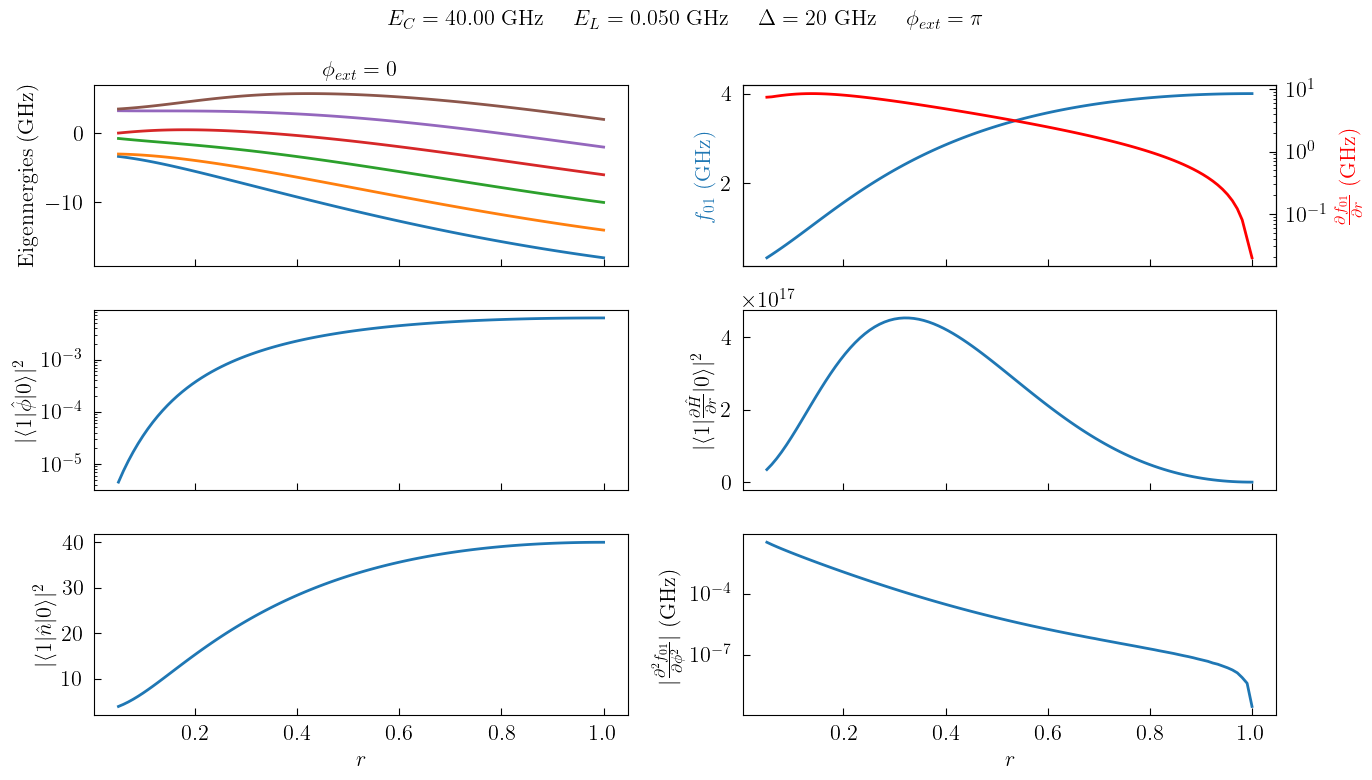

In [111]:
figure_features()
fig, axs = plt.subplots(3, 2, figsize=(14, 8), sharex = True, sharey = False)

plt.suptitle(r'$E_{C} = %.2f $ GHz $\quad E_{L} = %.3f$ GHz $\quad \Delta = %.0f$ GHz $\quad \phi_{ext} = \pi$' %(Ec*1e-9, El*1e-9, EDelta*1e-9))
axs[0,0].plot(r_list, eigvals_list_phi_0[:,:]*1e-9)
axs[0,0].set_ylabel(r'Eigennergies (GHz)')
axs[0,0].set_title(r'$\phi_{ext} = 0$')

axs[0,1].plot(r_list, (eigvals_list_phi_0[:,1]-eigvals_list_phi_0[:,0])*1e-9)
axs[0,1].set_ylabel(r'$f_{01}$ (GHz)', color = 'C0')
axs2 = axs[0,1].twinx()
# plot the derivative of the energy difference wrt to r in the same plot but different y axis
axs2.plot(r_list, np.gradient(eigvals_list_phi_0[:,1]-eigvals_list_phi_0[:,0], r_list)*1e-9, color = 'red')
# write the ylabel of the second axis
axs2.set_ylabel(r'$\frac{\partial f_{01}}{\partial r}$ (GHz)', color = 'red')
axs2.set_yscale('log')

axs[1,0].plot(r_list, phi_matrix_elements_list[0,:])
axs[1,0].set_yscale('log')
axs[1,0].set_ylabel(r'$|\langle 1 | \hat{\phi} | 0 \rangle|^2$ ')

axs[1,1].plot(r_list, dHdr_matrix_elements_list[0,:])
axs[1,1].set_ylabel(r'$|\langle 1 | \frac{\partial\hat{H}}{\partial r} | 0 \rangle|^2$ ')
# axs[1,1].set_yscale('log')

axs[2,0].plot(r_list, n_matrix_elements_list[0,:], label = r'$|\langle \phi | \hat{n} \rangle|^2$')
axs[2,0].set_ylabel(r'$|\langle 1 | \hat{n} | 0 \rangle|^2$')

axs[2,0].set_xlabel(r'$r$')
axs[2,1].plot(r_list, np.abs(d2E01_dphi2_list[0,:]*1e-9))
axs[2,1].set_ylabel(r'$|\frac{\partial^2 f_{01}}{\partial \phi^2}|$ (GHz)')
axs[2,1].set_yscale('log')
axs[2,1].set_xlabel(r'$r$')

# axs[2,1].set_yscale('log')
# axs[2,1].set_xscale('log')

fig.savefig('r_sweep_Ec%.2f_El%.3f_EDelta%.0f_phi_ext_pi.pdf' %(Ec*1e-9, El*1e-9, EDelta*1e-9), bbox_inches='tight')
plt.tight_layout()
plt.show()

In [16]:
5*1e9*np.logspace(-2, 1,50)

array([5.00000000e+07, 5.75697700e+07, 6.62855683e+07, 7.63208984e+07,
       8.78755312e+07, 1.01179482e+08, 1.16497591e+08, 1.34134790e+08,
       1.54442180e+08, 1.77824015e+08, 2.04745753e+08, 2.35743318e+08,
       2.71433772e+08, 3.12527596e+08, 3.59842837e+08, 4.14321386e+08,
       4.77047738e+08, 5.49270571e+08, 6.32427608e+08, 7.28174239e+08,
       8.38416468e+08, 9.65348864e+08, 1.11149824e+09, 1.27977396e+09,
       1.47352585e+09, 1.69661089e+09, 1.95346997e+09, 2.24921633e+09,
       2.58973734e+09, 2.98181166e+09, 3.43324423e+09, 3.95302161e+09,
       4.55149089e+09, 5.24056567e+09, 6.03396320e+09, 6.94747747e+09,
       7.99929360e+09, 9.21034985e+09, 1.06047544e+10, 1.22102655e+10,
       1.40588435e+10, 1.61872877e+10, 1.86379686e+10, 2.14596713e+10,
       2.47085668e+10, 2.84493301e+10, 3.27564278e+10, 3.77156003e+10,
       4.34255687e+10, 5.00000000e+10])

In [82]:
# calculate <1|phi|0> for different values of El and r in a matrix
# do a exponential sweep of El between 0.05 and 50
phi_ext = 0
El_list = 5*1e9*np.logspace(-2, 1,20)
r_list = np.logspace(0.05, 0.95,20)
phi_matrix_elements_list = np.zeros((len(El_list),len(r_list)))
n_matrix_elements_list = np.zeros((len(El_list),len(r_list)))
d2E01dphi2_list = np.zeros((len(El_list),len(r_list)))
# dHdr_matrix_elements_list = np.zeros((len(El_list),len(r_list)))
for i, El in enumerate(tqdm(El_list)):
    for j, r in enumerate(r_list):
        phi_ext = 0
        eigvals_list, _, matrix_op_sqr_list = eigensystem_and_matrix_elements_sqr_fbq(Ec,El,EDelta,phi_ext,r, N = 100, eigvals = eigvals)
        phi_matrix_elements_list[i,j] = np.abs(El *matrix_op_sqr_list[0])
        n_matrix_elements_list[i,j] = np.abs(8*Ec * matrix_op_sqr_list[1])
        # dHdr_matrix_elements_list[i,j] = np.abs(matrix_op_sqr_list[2])**2

        phi_ext_list = np.linspace(phi_ext, phi_ext + 0.1,10)
        eigvals_list = np.zeros(len(phi_ext_list))

        for k, phi_ext_aux in enumerate(phi_ext_list):
            energy0,energy1 = eigenenergies_fbq(Ec, El, EDelta, phi_ext_aux,r,N,eigvals = 2)
            eigvals_list[k] = np.real(energy1 - energy0)

        phi_ext_list = np.concatenate([-phi_ext_list[::-1][0:-1],phi_ext_list])
        eigvals_list = np.concatenate([eigvals_list[::-1][0:-1],eigvals_list])
        dE01_dphi = np.gradient(eigvals_list,phi_ext_list)
        d2E01_dphi2 = np.gradient(dE01_dphi,phi_ext_list)
        d2E01dphi2_list[i,j] = d2E01_dphi2[len(phi_ext_list)//2]

100%|██████████| 20/20 [13:52<00:00, 41.61s/it]


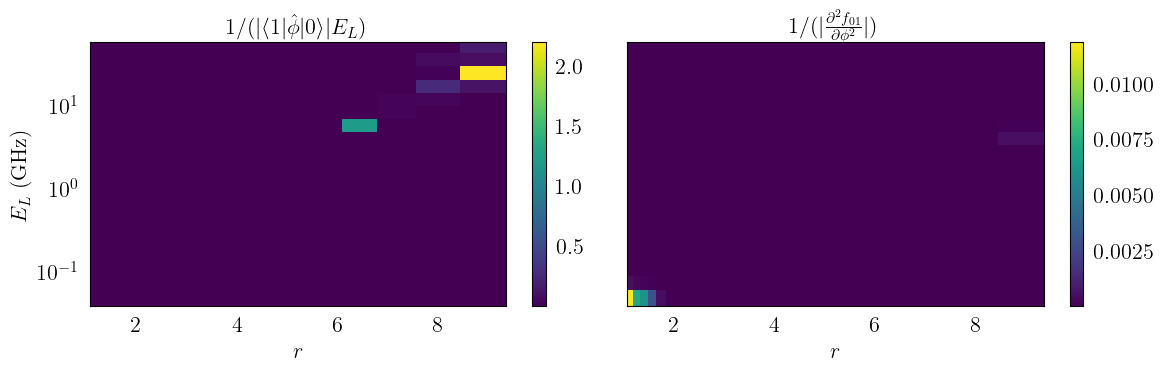

In [87]:
# plot phi_matrix_elements_list as a function of r and El
figure_features()
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharex = True, sharey = True)

# axs[0].pcolormesh(r_list, El_list*1e-9, phi_matrix_elements_list/EDelta**2, cmap = 'viridis')
axs[0].set_xlabel(r'$r$')
axs[0].set_ylabel(r'$E_{L}$ (GHz)')
axs[0].set_title(r'$1/(|\langle 1 | \hat{\phi} | 0 \rangle|E_L)$')

# axs[1].pcolormesh(r_list, El_list*1e-9, n_matrix_elements_list/EDelta**2, cmap = 'viridis')
# axs[0,1].set_xlabel(r'$r$')
# axs[0,1].set_ylabel(r'$E_{L}$ (GHz)')
# axs[0,1].set_title(r'$8E_C|\langle 1 | \hat{n} | 0 \rangle|$ (GHz)')

axs[1].set_xlabel(r'$r$')
# axs[1].set_ylabel(r'$E_{L}$ (GHz)')
axs[1].set_title(r'$1/(|\frac{\partial^2 f_{01}}{\partial \phi^2}|)$')

#show the color bar
fig.colorbar(axs[0].pcolormesh(r_list, El_list*1e-9, 1/(np.sqrt(phi_matrix_elements_list)), cmap = 'viridis'), ax=axs[0])
# fig.colorbar(axs[0,1].pcolormesh(r_list, El_list*1e-9, np.log(1/(np.sqrt(n_matrix_elements_list))), cmap = 'PuBu_r'), ax=axs[0,1])
fig.colorbar(axs[1].pcolormesh(r_list, El_list*1e-9, 1/(np.abs(d2E01dphi2_list)), cmap = 'viridis'), ax=axs[1])

#plot it in log scale
# axs[0].set_yscale('log')
axs[0].set_yscale('log')
# axs[0].set_xscale('log')
# axs[0,1].set_yscale('log')
# axs[1].set_yscale('log')
# axs[1].set_xscale('log')

# fig.savefig('El_r_sweep_Ec%.2f_EDelta%.0f_phi_ext_0.pdf' %(Ec*1e-9, EDelta*1e-9), bbox_inches='tight')
plt.tight_layout()
plt.show()